<a href="https://colab.research.google.com/github/sethli2003/sleep-efficiency/blob/main/sleep_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
filename = "/content/gdrive/MyDrive/Colab Notebooks/Sleep_Efficiency.csv"
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
#load the dataset and print the dataset
data = pd.read_csv(filename)
data

Mounted at /content/gdrive


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [ ]:
print(data.isnull().sum())

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64


In [ ]:
data=data.dropna()
print(data.isnull().sum())

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64


In [ ]:

data.head()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
data_processed = pd.get_dummies(data, columns=['Gender','Smoking status'])
data_processed.columns
data_processed.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male,Smoking status_No,Smoking status_Yes
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,40.829897,7.451031,0.789253,22.680412,52.822165,24.497423,1.618557,22.680412,1.146907,1.757732,0.500000,0.500000,0.657216,0.342784
std,13.403187,0.883483,0.135706,3.430510,15.571518,15.309638,1.355958,28.997566,1.612793,1.447824,0.500646,0.500646,0.475253,0.475253
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.700000,20.000000,51.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000,0.500000,0.500000,1.000000,0.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,24.000000,3.000000,50.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000


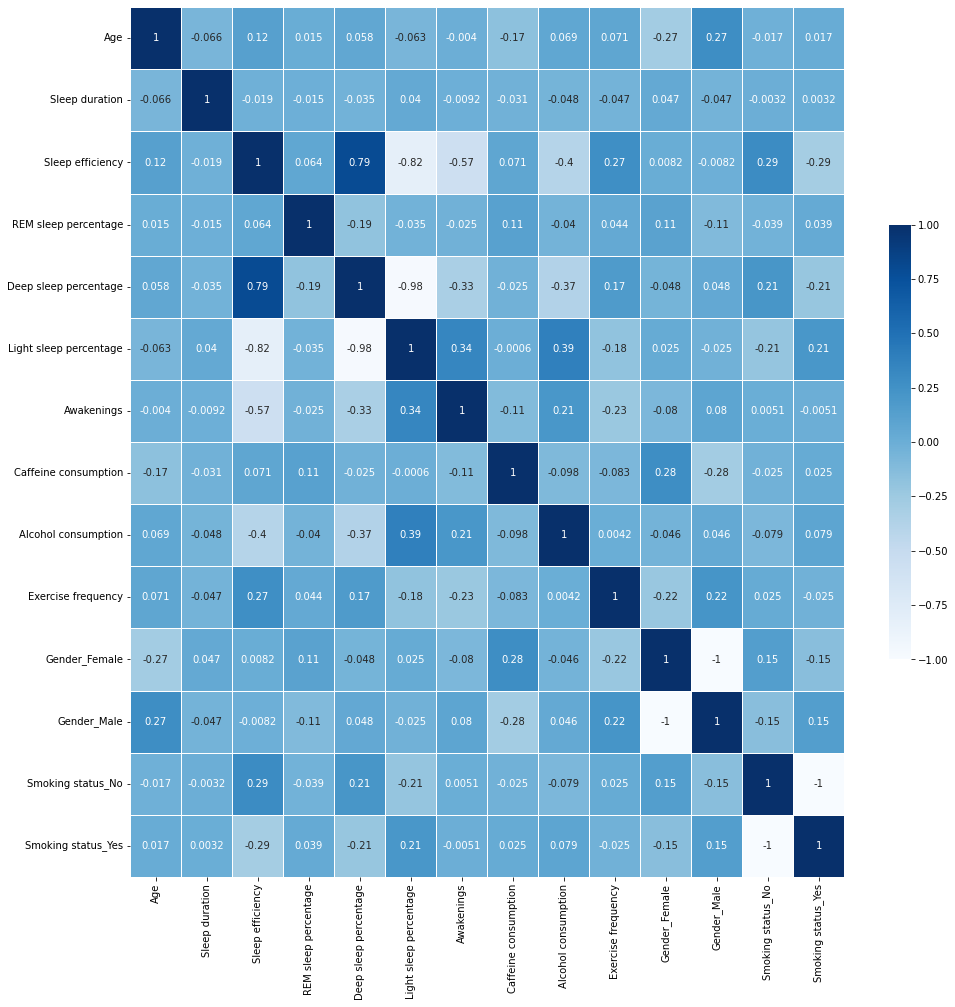

In [ ]:
# Set the figure size
corr = data_processed.corr()
plt.figure(figsize=(16, 16))
# Create the heatmap with higher resolution
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2g', linewidths=0.5, cbar_kws={'shrink': 0.5})

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting the data
X = data_processed.drop('Sleep efficiency', axis=1)
y = data_processed['Sleep efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"R2: {r2:.2f}")


R2: 0.81


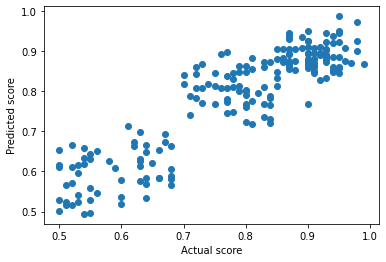

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual score")
plt.ylabel("Predicted score")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2:.2f}")

R2: 0.88


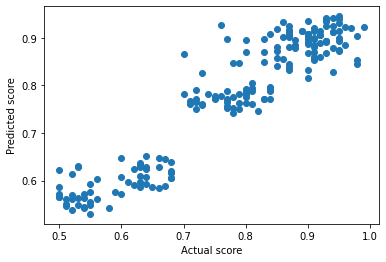

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual score")
plt.ylabel("Predicted score")
plt.show()